In [2]:
# importing the libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
df = pd.read_csv(r'D:\Work\Programs\MachineLearning\resampled_data.csv')

In [4]:
# overview of the entire dataset to analyse if there's any further pre-processing of the data to be done for SVM algorithm

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11594 entries, 0 to 11593
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             11594 non-null  float64
 1   sex             11594 non-null  int64  
 2   nationality     11594 non-null  int64  
 3   current_status  11594 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 362.4 KB


In [5]:
# setting the feature vectors and target variables

X = df[['age', 'sex', 'nationality']]
y = df['current_status']

In [6]:
# splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# initialising and training the svm model with the linear kernel

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# predicting the values for model performance evaluation

y_pred = svm.predict(X_test)

In [9]:
# accuracy score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8438982319965502


In [10]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1223
           1       0.81      0.88      0.84      1096

    accuracy                           0.84      2319
   macro avg       0.85      0.85      0.84      2319
weighted avg       0.85      0.84      0.84      2319



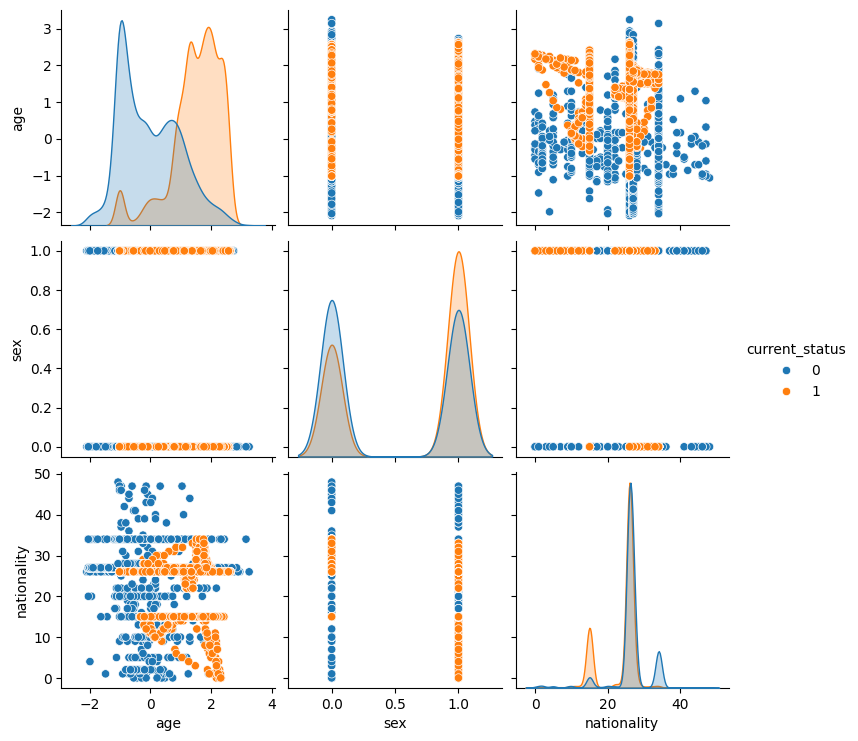

In [11]:
# eda to analyze the hyperplane (at least find a range if where it would exist)

sns.pairplot(df, hue = "current_status", vars=["age", "sex", "nationality"])
plt.show()

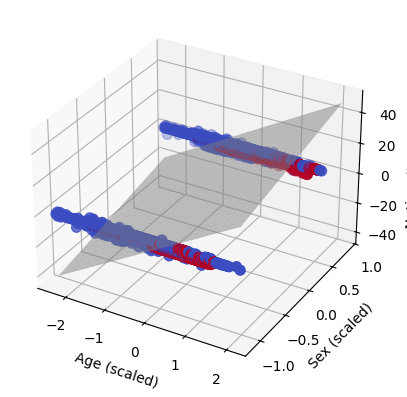

In [12]:
# plotting the hyperplane (unsuccesful attempt)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

w = svm.coef_[0]
b = svm.intercept_[0]

x_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 30)
y_range = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 30)
xx, yy = np.meshgrid(x_range, y_range)

zz = (-w[0] * xx - w[1] * yy - b) / w[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y, cmap=plt.cm.coolwarm, s=50)
ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Sex (scaled)')
ax.set_zlabel('Nationality (scaled)')

plt.show()